+ 代码2 -1 用interpolate模块进行Lagrange 插值

In [1]:
import numpy as np 
import scipy
x = np. array([ 1, 2, 3, 4, 5, 8, 9, 10]) #创建自变批x 
y1 =np. array([2, 8, 18, 32, 50, 128, 162, 200]) #创建因变量yl 
y2=np.array([3, 5, 7, 9, 11, 17, 19, 21]) #创建因变量y2 
Lag_Valuel = scipy.interpolate.lagrange (x, y1) # Lagrange 插值拟合 x, yl 
Lag_Value2 = scipy.interpolate.lagrange (x, y2) # Lagrange 插值拟合 x, y2 
print('当x为6, 7时，使用Lagrange 插值 yl为：' , Lag_Valuel([6, 7]))
print('当x为6, 7时，使用Lagrange 插值 y2为： ' ,Lag_Value2 ([ 6, 7 ]))

当x为6, 7时，使用Lagrange 插值 yl为： [72. 98.]
当x为6, 7时，使用Lagrange 插值 y2为：  [13. 15.]


+ 代码2-2 自定义 Newton 插值

In [2]:
# 自定义阶跳跃差分函数
def diff_self(xi, k):
    '''
    xi:接收array。表示自变量 x。无默认， 不可省略
    k:接收int。表示差分的次数。 无默认， 不可省略
    '''
    diffValue = [] 
    for i in range(len(xi) - k) : 
        diffValue.append(xi[i + k] -xi[i]) 
    return diffValue 
#自定义求取差商函数
def diff_quot(xi, yi):
    '''
    xi:接收array。表示自变械 x。尤默认， 不可省略
    yi:接收array。表示因变晕 y。无默认， 不可省略
    '''
    length = len (xi) 
    quot=[] 
    temp =yi
    for i in range (1, length):
        tern = np.diff(temp, 1) / diff_self(xi, i)# 此处需要numpy广播特性支持
        quot.append (tern [0]) 
        temp= tern
    return (quot)
# 自定义求取(x-xO) * (x -xl)…．．＊(x -xO) 
def get_Wi(k = 0, xi = []) : 
    ''' 
    xi: 接收 array。表示自变趾x。无默认，不可省略
    yi: 接收 array。表示因变趾y。无默认，不可省略
    '''
    def Wi(x):
        
        '''
        X: 接收 int, float, ndarray。 表示插值节点。 无默认
        '''
        result= 1.0 
        for each in range (k) : 
            result *= (x - xi[each]) 
        return result 
    return Wi
# 自定义牛顿插值公式
def get_Newton_inter (xi, yi):
    '''
    i: 接收 array。表示自变趾x。无默认，不可省略
    yi: 接收 array。表示因变趾y。无默认，不可省略
    '''
    diffQuot = diff_quot(xi, yi) 
    def Newton_inter(x):
        '''
        x ：接收 int, float, ndarray。 表示插值节点。 无默认
        '''
        result= yi[0] 
        for i in range(0, len(xi) -1): 
            result +=get_Wi(i+1, xi)(x) *diffQuot[i] 
        return result 
    return Newton_inter 
Newt_Valuel = get_Newton_inter(x, y1) # Newton插值拟合x, yl 
Newt_Value2 = get_Newton_inter(x, y2) # Newton插值拟合x, y2 
print('当x为6, 7时，使用Newton插值yl为：', Newt_Valuel([6,7]))
print('当x为6, 7时，使用Newton插值y2为：', Newt_Value2([6,7]))

当x为6, 7时，使用Newton插值yl为： [72. 98.]
当x为6, 7时，使用Newton插值y2为： [13. 15.]


+ 代码2-3 小数定标标准化示例

In [3]:
##自定义小数定标差标准化函数
def DecimalScaler(data):
    data= data/10 ** np.ceil(np.log10(data.max()))
    return data 
x = np.array([ 1, 2, 3, 4, 5, 8, 9, 10])
DecimalScaler(x)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1. ])

+ 代码2-4 等频法离散化示例

In [4]:
def SameRateCut(data, k):
    w = data.quantile(np.arange (0, 1 + 1.0/k, 1.0/k))
    data = pd.cut (data, w) 
    return data 

+ 代码2 -5 基于聚类分析的离散化


In [5]:
##自定义数据 K-Means 聚类离散化函数
import pandas as pd
def KmeanCut(data, k): 
    from sklearn.cluster import KMeans #引入KMeans
    kmodel = KMeans(n_clusters = k) #建立模型，n_]．obs是并行数 
    kmodel.fit(data.reshape((len(data), 1))) ##训练模型
    c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) # 输出聚类中心并排序
    w = pd.rolling_mean(c, 2).iloc[1:]
   
    w=[O] + list(w[O]) +[data.max()]
    data= pd.cut(data, w) 
    return data 

In [6]:
import pandas as pd
sheet_name = '因子分析2'
df = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号' )# 
y = np.array(df['SiO2'])
data = KmeanCut(df,4)

AttributeError: 'DataFrame' object has no attribute 'reshape'

+ 剔除奇异值

In [7]:
#剔除奇异值
def remove_singular(arr,n):
    #创建新数组用于存储原数据
    tem_1 = []
    tem_2 = []
    #取出第一列和第二列数据
    for i in range(len(arr)):
        tem_1.append(arr[i][0])
        tem_2.append(arr[i][1])
    tem_1_std = np.std(tem_1, ddof=1)  # 求第一列数据标准差
    tem_2_std = np.std(tem_2, ddof=1)
    tem_1_mean = np.mean(tem_1)  # 求第一列数据平均值
    tem_2_mean = np.mean(tem_2)
    #创建新数组用于存储剔除奇异值后的数据
    arr1 = []
    arr2 = []
    #提供一个阈值(此处取数组中数据的平均值+-2倍的标准差为阈值)削去奇异值
    for i in range(len(tem_1)):
        if tem_1[i] <= tem_1_mean + 2 * tem_1_std and tem_1[i] >= tem_1_mean - 2 * tem_1_std:
            arr1.append(tem_1[i])
    #展示原数据曲线图
    plt.figure('tem_1')
    plt.plot(np.linspace(-20,20,len(tem_1)),tem_1)#生成一个数量为len(tem_1)的等间距样本，在区间[-20,20]内
    #展示剔除奇异值后的曲线图像
    plt.figure('arr1')
    plt.plot(np.linspace(-20,20,len(arr1)),arr1)
    for j in range(len(tem_2)):
        if tem_2[j] <= tem_2_mean + 2 * tem_2_std and tem_2[j] >= tem_2_mean - 2 * tem_2_std:
            arr2.append(tem_2[j])
    plt.figure('tem_2')
    plt.plot(tem_2)
    plt.figure('arr2')
    plt.plot(arr2)
    #滑动平均去高斯噪声
    window = np.ones(n)/n
    c = np.convolve(arr1,window,'valid')#numpy中的卷积库函数，’valid‘返回的是完全重叠的点，边缘的点无效
    d = np.convolve(arr2,window,'valid')
    #展示去噪后的图线
    plt.figure('c')
    plt.plot(c)
    plt.figure('d')
    plt.plot(d)
    plt.show()
    return arr1,arr2,c,d

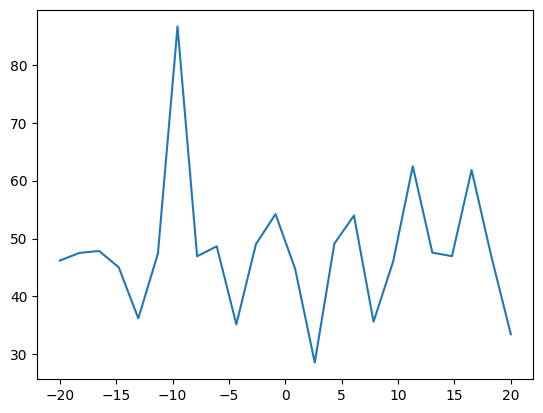

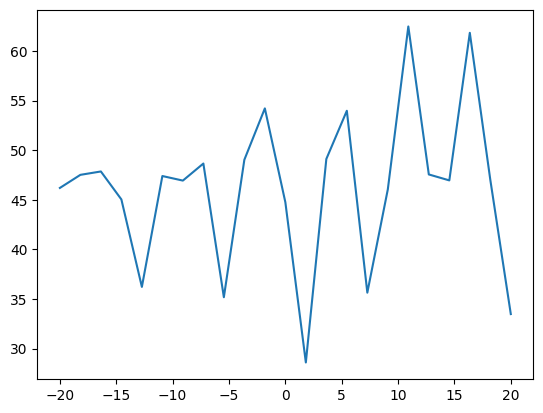

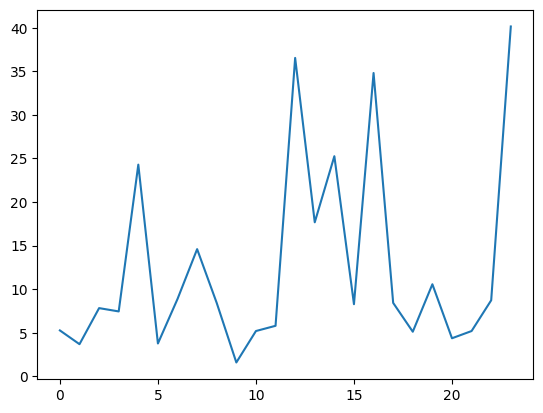

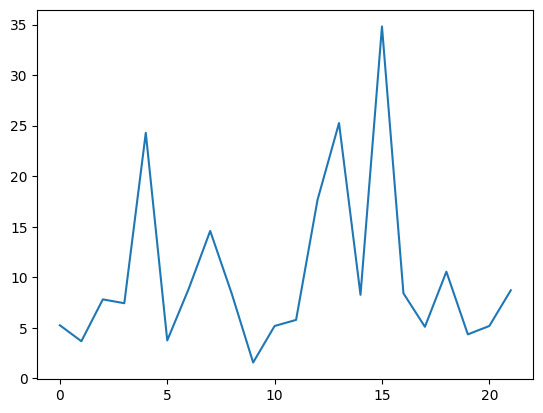

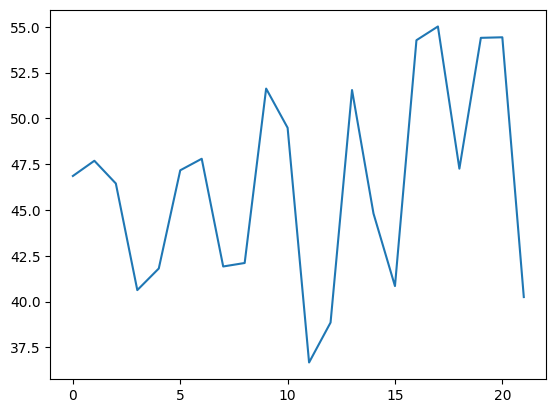

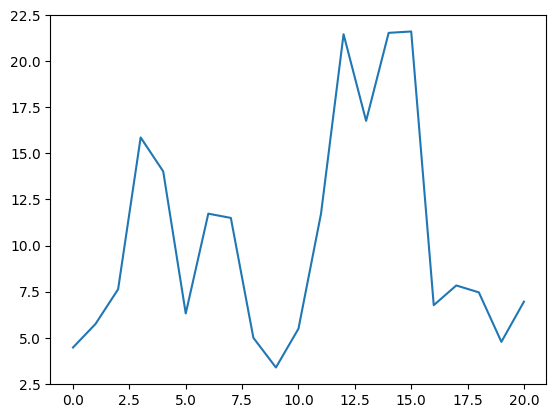

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sheet_name = '因子分析2'
df = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号' )# 
y = np.array(df.iloc[:,4:6])
arr1,arr2,c,d = remove_singular(y,n=2)

+ 数据规范化

In [9]:
#最大最小值规范化以及零均值规范化函数
import numpy as np
import scipy.io
import copy
import matplotlib.pyplot as plt
def standard(y):
    #创建空数组存取第一、二列数
    tem_1 = []
    tem_2 = []
    #取出第一列和第二列数据
    for i in range(len(y)):    #此处也可用for i,item in enumerate(y):
        tem_1.append(y[i][0])
        tem_2.append(y[i][1])
    tem_1.sort()#对第一列数据进行排序
    tem_2.sort()
    max_1 = tem_1[-1]#取出第一列数据最大值
    min_1 = tem_1[0]#取出第一列数据最小值
    max_2 = tem_2[-1]
    min_2 = tem_2[0]
    xx = copy.deepcopy(y)#深拷贝以便后序进行零均值规范化
    # 最小-最大规范化：
    for j in range(len(y)):
        y[j][0] = (y[j][0] - min_1)/(max_1 - min_1)#公式为x' = (x - min)/(max - min)映射到[0,1]
        y[j][1] = (y[j][1] - min_2)/(max_2 - min_2)
    #零均值规范化
    tem_1_std = np.std(tem_1, ddof=1)  # 求第一列数据标准差
    tem_2_std = np.std(tem_2, ddof=1)
    tem_1_mean = np.mean(tem_1)  # 求第一列数据平均值
    tem_2_mean = np.mean(tem_2)
    for k in range(len(xx)):
        xx[k][0] = (xx[k][0] - tem_1_mean)/tem_1_std#公式为x' = (x - mean)/std
        xx[k][1] = (xx[k][1] - tem_2_mean)/tem_2_std
    print("最大最小规范化",y)
    plt.figure('第一列规范化分布')
    plt.plot(y[:, 0])
    plt.figure('第二列规范化分布')
    plt.plot(y[:, 1])
    print("零均值规范化",xx)
    #画出图像分布用于对比
    plt.figure('第一列零均值分布')
    plt.plot(xx[:, 0])
    plt.figure('第二列零均值分布')
    plt.plot(xx[:, 1])
    plt.show()



最大最小规范化 [[0.41837432 0.        ]
 [0.25       0.        ]
 [0.10484973 0.02093596]
 [0.44501366 0.11576355]
 [0.35040984 0.15147783]
 [0.82172131 0.        ]
 [0.02151639 0.01970443]
 [0.49385246 0.12807882]
 [0.20013661 0.        ]
 [0.2295082  0.34236453]
 [0.90471311 0.17980296]
 [0.05840164 0.        ]
 [0.10689891 0.0320197 ]
 [0.         0.13300493]
 [0.08674863 0.53325123]
 [0.6704235  0.        ]
 [0.02595628 0.25246305]
 [0.26912568 0.07512315]
 [0.10382514 0.02832512]
 [0.82411202 0.62068966]
 [0.70355191 0.09236453]
 [1.         0.4408867 ]
 [0.8227459  0.3546798 ]
 [0.1704235  1.        ]]
零均值规范化 [[ 0.12368349 -0.75316917]
 [-0.39766424 -0.75316917]
 [-0.84710193 -0.66946091]
 [ 0.20616853 -0.29031173]
 [-0.0867591  -0.14751529]
 [ 1.37259154 -0.75316917]
 [-1.10513205 -0.67438493]
 [ 0.35739109 -0.24107158]
 [-0.5520593  -0.75316917]
 [-0.46111426  0.61570708]
 [ 1.62956415 -0.03426294]
 [-0.990922   -0.75316917]
 [-0.84075693 -0.62514477]
 [-1.17175458 -0.22137552]
 [-0.9

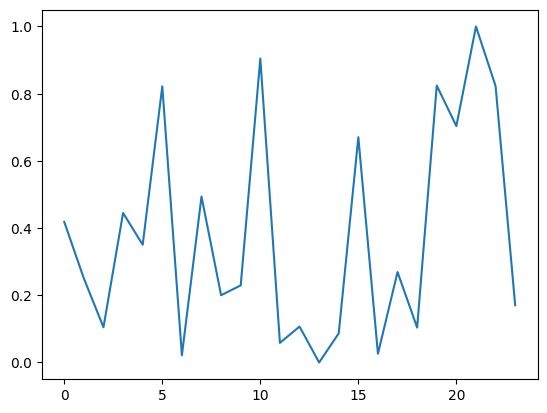

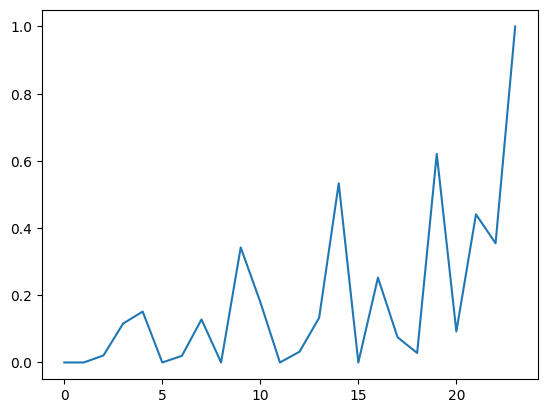

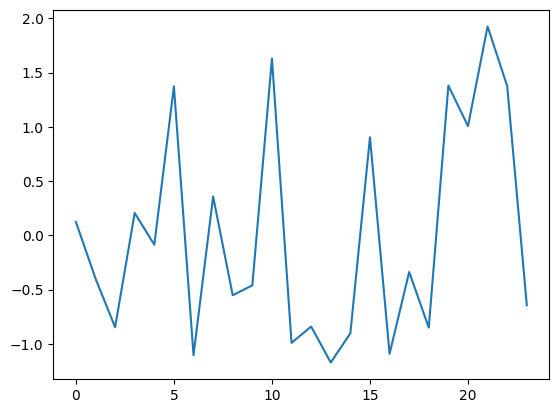

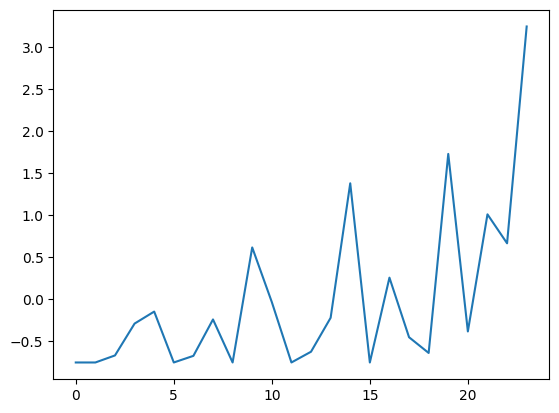

In [10]:
import pandas as pd
sheet_name = '因子分析2'
df = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号' )# 
y = np.array(df.iloc[:,1:3])
standard(y)

+ 实现最小最大、零均值、小数定标规范化、pca降维

最小小-最大规范化:
         有机含量      黏土矿物      FeS2    碳酸盐      SiO2     Fe2O3     Al2O3  \
编号                                                                      
1   0.676623  0.418374  0.000000  0.160  0.303344  0.095411  0.810895   
2   0.826234  0.250000  0.000000  0.064  0.326094  0.054446  0.920194   
3   0.937143  0.104850  0.020936  0.000  0.331954  0.161784  0.887925   
4   0.645455  0.445014  0.115764  0.188  0.283351  0.151932  0.863289   
5   0.702338  0.350410  0.151478  0.304  0.131334  0.588800  0.626995   
6   0.389091  0.821721  0.000000  1.000  0.324026  0.056521  1.000000   
7   1.000000  0.021516  0.019704  0.000  1.000000  0.189007  0.713740   
8   0.617922  0.493852  0.128079  0.000  0.316098  0.337309  0.908050   
9   0.868312  0.200137  0.000000  0.000  0.345743  0.177081  0.945177   
10  0.773766  0.229508  0.342365  0.000  0.113409  0.000000  0.656836   
11  0.294545  0.904713  0.179803  0.000  0.352292  0.093596  0.975017   
12  0.971169  0.058402  0.000000  0.000

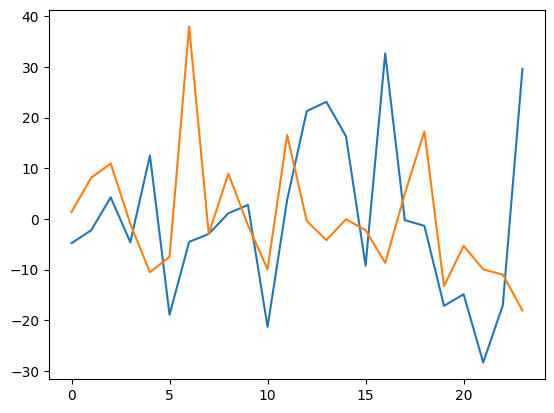

PCA降维：
 [[ -4.77988145   1.35536419]
 [ -2.2461075    8.12600514]
 [  4.26307733  10.94311029]
 [ -4.5986016   -0.96701113]
 [ 12.52802395 -10.51605108]
 [-18.8924023   -7.47676538]
 [ -4.52290894  38.00008253]
 [ -2.95784338  -2.95643775]
 [  1.12031154   8.94232619]
 [  2.7624644   -1.22337871]
 [-21.30354233  -9.9382269 ]
 [  3.77560446  16.55811825]
 [ 21.29154829  -0.39894666]
 [ 23.12350697  -4.16856688]
 [ 16.33403468  -0.06865946]
 [ -9.21851767  -2.20913507]
 [ 32.67628536  -8.68044379]
 [ -0.22837819   4.97727207]
 [ -1.36210098  17.25972419]
 [-17.16785727 -13.26147431]
 [-14.86313259  -5.29834446]
 [-28.33352698  -9.94941842]
 [-17.02566887 -10.98755596]
 [ 29.62561305 -18.06158687]]


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

#--------------------------------------------最小-最大规范化--------------------------------------------
def MinMax_Normalize(data):
    text=(data - data.min())/(data.max() - data.min())          #最小-最大规范化
    text.to_excel ('./最小-最大规范化.xlsx',index=None)   #另存为excel（删除索引
    return text

#--------------------------------------------零-均值规范化--------------------------------------------
def ZeroAvg_Normalize(data):
    text=(data - data.mean())/data.std() 
    text.to_excel ('./零-均值规范化.xlsx',index=None)
    return text

#--------------------------------------------小数定标规范化--------------------------------------------
def Float_Normalize(data):
    text=data/10**np.ceil(np.log10(data.abs().max())) 
    text.to_excel ('.小数定标规范化.xlsx',index=None)
    return (text)

#--------------------------------------------pca降维代码--------------------------------------------

def PCA(data):
#调用sklearn库实现PCA:
    pca = decomposition.PCA()
    pca.fit(data)                                         #X_arr是原始数据集，一行表示一个样本，一列表示一个feature
    pca.n_components = 2                        #降为1维
    X_reduced = pca.fit_transform(data) #X_reduced是降维后的数据集
    plt.plot(X_reduced)
    plt.show()
    return(X_reduced)

if __name__ == '__main__':
    #读取excel文件：
    sheet_name = '因子分析2'
    data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0, index_col= '编号' )#
#     print(data)
    #规范化：
    M=MinMax_Normalize(data) 
    F=Float_Normalize(data)
    Z=ZeroAvg_Normalize(data)
    print('最小小-最大规范化:\n', M)
    print('小数定标规范化:\n', F)
    print('零-均值规范化:\n', Z)
    #PCA降维：
    print('PCA降维：\n', PCA(data))



In [12]:
#coding:utf-8
import pandas as pd
import numpy as np
from scipy.interpolate import lagrange#拉格朗日函数
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0 )#
#自定义列向量插值函数
# 过滤异常值，并置为空值
data['SiO2'][(data['SiO2'] < 30) | (data['SiO2'] > 80)] = np.NAN
print(data)

# 自定义列向量插值函数
def ployinterp_columns(s, n, k=4):
    if n < k:
        y = s[list(range(0, n)) + list(range(n + 1, n + k + 1))]
    elif n > len(s) - k - 1:
        y = s[list(range(n - k, n)) + list(range(n + 1, len(s)))]
    else:
        y = s[list(range(n - k, n)) + list(range(n + 1, n + k + 1))]  # 取空值处的前后3个数
    y = y[y.notnull()]  # 剔除空值
    return lagrange(y.index, list(y))(n)  # 插值并返回插值结果


# 逐个判断元素是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:  # 如果为空则插值
            print(data[i])
            print(ployinterp_columns(data[i], j))
            data[i][j] = ployinterp_columns(data[i], j)

data.to_excel('lagrange.xlsx')  # 输出结果，写入文件


    编号   有机含量   黏土矿物  FeS2   碳酸盐   SiO2  Fe2O3  Al2O3   CaO   MgO
0    1  86.76  12.25  0.00  0.40  46.20   5.26  34.55  3.58  1.30
1    2  92.52   7.32  0.00  0.16  47.52   3.68  37.70  1.95  0.59
2    3  96.79   3.07  0.17  0.00  47.86   7.82  36.77  1.38  0.63
3    4  85.56  13.03  0.94  0.47  45.04   7.44  36.06  3.43  0.65
4    5  87.75  10.26  1.23  0.76  36.22  24.29  29.25  3.23  1.15
5    6  75.69  24.06  0.00  2.50  47.40   3.76  40.00  0.97  1.15
6    7  99.21   0.63  0.16  0.00    NaN   8.87  31.75  2.82  0.96
7    8  84.50  14.46  1.04  0.00  46.94  14.59  37.35  2.20  0.89
8    9  94.14   5.86  0.00  0.00  48.66   8.41  38.42  0.51  0.67
9   10  90.50   6.72  2.78  0.00  35.18   1.58  30.11  0.51  0.59
10  11  72.05  26.49  1.46  0.00  49.04   5.19  39.28  0.05  0.74
11  12  98.10   1.71  0.00  0.00  54.22   5.79  32.04  1.33  0.63
12  13  96.35   3.13  0.26  0.00  44.76  36.54  36.20  0.67  0.70
13  14  98.48   0.00  1.08  0.44    NaN  17.67  24.37  3.37  5.56
14  15  88

C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3387362237.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SiO2'][(data['SiO2'] < 30) | (data['SiO2'] > 80)] = np.NAN
C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3387362237.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = ployinterp_columns(data[i], j)
C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3387362237.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [13]:
#coding:utf-8
import pandas as pd
import numpy as np
from scipy.interpolate import lagrange#拉格朗日函数
sheet_name = '因子分析2'
data = pd.read_excel(r'./data.xlsx',sheet_name= sheet_name, header= 0 )#
#自定义列向量插值函数
# 过滤异常值，并置为空值
data['SiO2'][(data['SiO2'] < 30) | (data['SiO2'] > 80)] = np.NAN
print(data)
# 分别定义求插商与求w的函数
def cal_f(x, y):
    """
    计算插商
    """
    f0 = np.zeros((len(x), len(y)))  # 定义一个存储插商的数组
    for k in range(len(y) + 1):  # 遍历列
        for i in range(k, len(x)):  # 遍历行
            if k == 0:
                f0[i, k] = y[i]
            else:
                f0[i, k] = (f0[i, k - 1] - f0[i - 1, k - 1]) / (x[i] - x[i - 1])
    print('差商表', '\n', f0)
    return f0


def newton(x, y, x_j):
    """
    牛顿差值多项式
    """
    f0 = cal_f(x, y)  # 计算插商
    f0 = f0.diagonal()
    # 与w相乘
    f1 = 0
    for i in range(len(f0)):
        s = 1
        k = 0
        while k < i:
            s = s * (x_j - x[k])
            k += 1
        f1 = f1 + f0[i] * s
    return f1


# 自定义列向量插值函数
def ployinterp_columns(s, n, x_j, k=3):
    if n < k:
        y = s[list(range(0, n)) + list(range(n + 1, n + k + 1))]
    elif n > len(s) - k - 1:
        y = s[list(range(n - k, n)) + list(range(n + 1, len(s)))]
    else:
        y = s[list(range(n - k, n)) + list(range(n + 1, n + k + 1))]  # 取空值处的前后5个数
    y = y[y.notnull()]  # 剔除空值
    return newton(y.index, list(y), x_j)  # 插值并返回插值结果


for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            x_j = data.index[j]
            print(ployinterp_columns(data[i], j, x_j))
            data[i][j] = ployinterp_columns(data[i], j, x_j)

data.to_excel('newton.xlsx')


C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3499030247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SiO2'][(data['SiO2'] < 30) | (data['SiO2'] > 80)] = np.NAN
C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3499030247.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = ployinterp_columns(data[i], j, x_j)
C:\Users\xyt55\AppData\Local\Temp\ipykernel_13380\3499030247.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

    编号   有机含量   黏土矿物  FeS2   碳酸盐   SiO2  Fe2O3  Al2O3   CaO   MgO
0    1  86.76  12.25  0.00  0.40  46.20   5.26  34.55  3.58  1.30
1    2  92.52   7.32  0.00  0.16  47.52   3.68  37.70  1.95  0.59
2    3  96.79   3.07  0.17  0.00  47.86   7.82  36.77  1.38  0.63
3    4  85.56  13.03  0.94  0.47  45.04   7.44  36.06  3.43  0.65
4    5  87.75  10.26  1.23  0.76  36.22  24.29  29.25  3.23  1.15
5    6  75.69  24.06  0.00  2.50  47.40   3.76  40.00  0.97  1.15
6    7  99.21   0.63  0.16  0.00    NaN   8.87  31.75  2.82  0.96
7    8  84.50  14.46  1.04  0.00  46.94  14.59  37.35  2.20  0.89
8    9  94.14   5.86  0.00  0.00  48.66   8.41  38.42  0.51  0.67
9   10  90.50   6.72  2.78  0.00  35.18   1.58  30.11  0.51  0.59
10  11  72.05  26.49  1.46  0.00  49.04   5.19  39.28  0.05  0.74
11  12  98.10   1.71  0.00  0.00  54.22   5.79  32.04  1.33  0.63
12  13  96.35   3.13  0.26  0.00  44.76  36.54  36.20  0.67  0.70
13  14  98.48   0.00  1.08  0.44    NaN  17.67  24.37  3.37  5.56
14  15  88